In [1]:
%%time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab
from scipy import stats
import seaborn as sns
import datetime as dt
import calendar
import builtins
import sys

%matplotlib inline



money20 = pd.read_csv('', encoding = 'unicode_escape')
money20['InvoiceDate'] = money20[['InvoiceDate']].apply(pd.to_datetime)
money20.head()


Wall time: 2min 10s


In [2]:
money20['Gross Revenue'] = money20['UnitPrice']*money20['Quantity']
money20.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Gross Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [3]:
money20.describe()

,Quantity,UnitPrice,CustomerID,Gross Revenue
count,541909.000000,541909.000000,406829.000000,541909.000000
mean,9.552250,4.611114,15287.690570,17.987795
std,218.081158,96.759853,1713.600303,378.810824
min,-80995.000000,-11062.060000,12346.000000,-168469.600000
25%,1.000000,1.250000,13953.000000,3.400000
50%,3.000000,2.080000,15152.000000,9.750000
75%,10.000000,4.130000,16791.000000,17.400000
max,80995.000000,38970.000000,18287.000000,168469.600000


In [4]:
#Dropped the unit prices <0 and the Quantity <0
money20new = money20[(money20['UnitPrice']>0)]
money20new = money20new[(money20new['Quantity']>0)]
print('Dropped values')
print (money20new.shape) # New values
print('')
print('original values')
print (money20.shape) # Original values

Dropped values
(530104, 9)

original values
(541909, 9)


In [5]:
#Check to see if we've dropped the values
money20new[(money20new['Quantity']<=0)].sort_values('Quantity')


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Gross Revenue


In [6]:
money20new.isnull().sum()

InvoiceNo             0
StockCode             0
Description           0
Quantity              0
InvoiceDate           0
UnitPrice             0
CustomerID       132220
Country               0
Gross Revenue         0
dtype: int64

In [7]:
money20new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 530104 entries, 0 to 541908
Data columns (total 9 columns):
InvoiceNo        530104 non-null object
StockCode        530104 non-null object
Description      530104 non-null object
Quantity         530104 non-null int64
InvoiceDate      530104 non-null datetime64[ns]
UnitPrice        530104 non-null float64
CustomerID       397884 non-null float64
Country          530104 non-null object
Gross Revenue    530104 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 40.4+ MB


In [8]:
money20new.describe()

,Quantity,UnitPrice,CustomerID,Gross Revenue
count,530104.000000,530104.000000,397884.000000,530104.000000
mean,10.542037,3.907625,15294.423453,20.121871
std,155.524124,35.915681,1713.141560,270.356743
min,1.000000,0.001000,12346.000000,0.001000
25%,1.000000,1.250000,13969.000000,3.750000
50%,3.000000,2.080000,15159.000000,9.900000
75%,10.000000,4.130000,16795.000000,17.700000
max,80995.000000,13541.330000,18287.000000,168469.600000


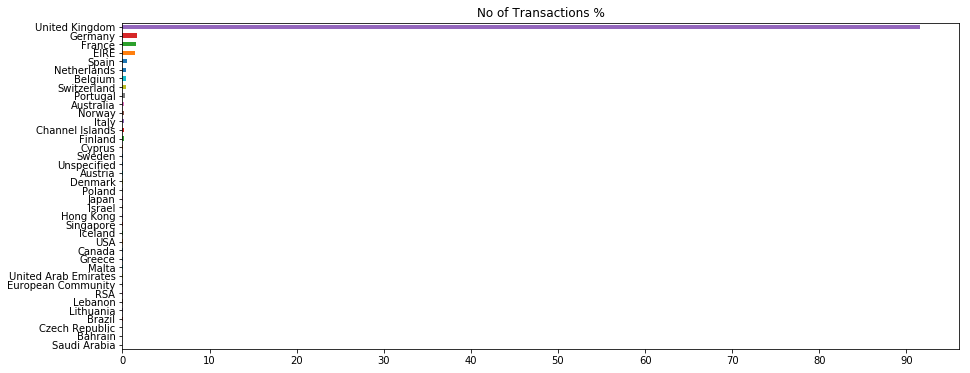

In [9]:
#Transactions by %

fig, axes = plt.subplots(figsize=(15,6))
(money20new['Country'].value_counts()/len(money20new['Country'])*100).sort_values(ascending=True).plot(kind='barh')
axes.xaxis.set(ticks=range(0,100,10))
plt.title('No of Transactions %')
plt.show()

In [10]:
# Percentage of gross revenue per country
(money20new.groupby('Country')['Gross Revenue'].sum()/money20new['Gross Revenue'].sum()*100).sort_values(ascending=False)

Country
United Kingdom          84.611315
Netherlands              2.676055
EIRE                     2.657376
Germany                  2.145626
France                   1.966076
Australia                1.298635
Spain                    0.577284
Switzerland              0.535217
Belgium                  0.386215
Sweden                   0.359796
Japan                    0.350778
Norway                   0.339050
Portugal                 0.316379
Finland                  0.211369
Singapore                0.199493
Channel Islands          0.191723
Denmark                  0.177706
Italy                    0.163905
Hong Kong                0.147110
Cyprus                   0.127410
Austria                  0.095612
Israel                   0.076268
Poland                   0.068762
Greece                   0.044630
Unspecified              0.044529
Iceland                  0.040406
Canada                   0.034372
USA                      0.033566
Malta                    0.025552
United

United Kingdom          485123
Germany                   9040
France                    8407
EIRE                      7890
Spain                     2484
Netherlands               2359
Belgium                   2031
Switzerland               1966
Portugal                  1501
Australia                 1182
Norway                    1071
Italy                      758
Channel Islands            748
Finland                    685
Cyprus                     614
Sweden                     451
Unspecified                446
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     295
Hong Kong                  284
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         57
Lebanon 

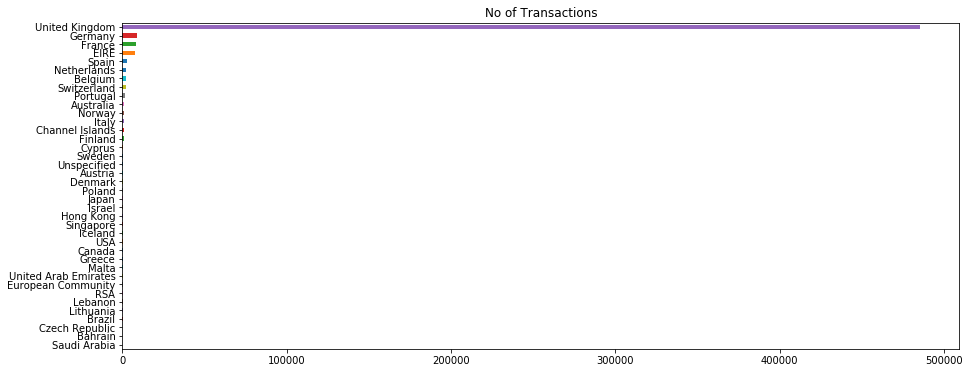

In [11]:
#No of transactions
print(money20new['Country'].value_counts().sort_values(ascending=False))


fig, axes = plt.subplots(figsize=(15,6))
money20new['Country'].value_counts().sort_values().plot(kind='barh')
plt.title('No of Transactions')
plt.show()

Country
United Kingdom          9.025222e+06
Netherlands             2.854463e+05
EIRE                    2.834540e+05
Germany                 2.288671e+05
France                  2.097151e+05
Australia               1.385213e+05
Spain                   6.157711e+04
Switzerland             5.708990e+04
Belgium                 4.119634e+04
Sweden                  3.837833e+04
Japan                   3.741637e+04
Norway                  3.616544e+04
Portugal                3.374710e+04
Finland                 2.254608e+04
Singapore               2.127929e+04
Channel Islands         2.045044e+04
Denmark                 1.895534e+04
Italy                   1.748324e+04
Hong Kong               1.569180e+04
Cyprus                  1.359038e+04
Austria                 1.019868e+04
Israel                  8.135260e+03
Poland                  7.334650e+03
Greece                  4.760520e+03
Unspecified             4.749790e+03
Iceland                 4.310000e+03
Canada                  3.6663

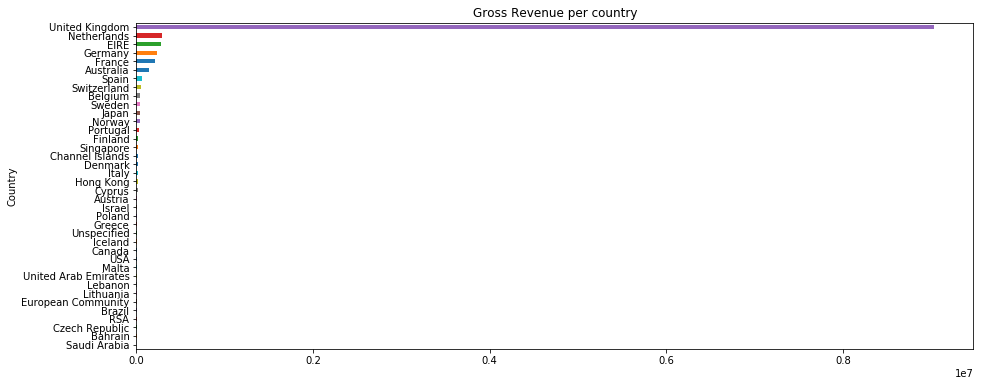

In [12]:
print(money20new.groupby('Country')['Gross Revenue'].sum().sort_values(ascending=False))

fig, axes = plt.subplots(figsize=(15,6))
money20new.groupby('Country')['Gross Revenue'].sum().sort_values().plot(kind='barh')
plt.title('Gross Revenue per country')
plt.show()

Country
United Kingdom          4662390
Netherlands              200361
EIRE                     147173
Germany                  119261
France                   112103
Australia                 83901
Sweden                    36083
Switzerland               30629
Spain                     27940
Japan                     26016
Belgium                   23237
Norway                    19336
Portugal                  16258
Finland                   10704
Channel Islands            9491
Denmark                    8235
Italy                      8112
Cyprus                     6361
Singapore                  5241
Austria                    4881
Hong Kong                  4773
Israel                     4409
Poland                     3684
Unspecified                3300
Canada                     2763
Iceland                    2458
USA                        2458
Greece                     1557
United Arab Emirates        982
Malta                       970
Czech Republic              671


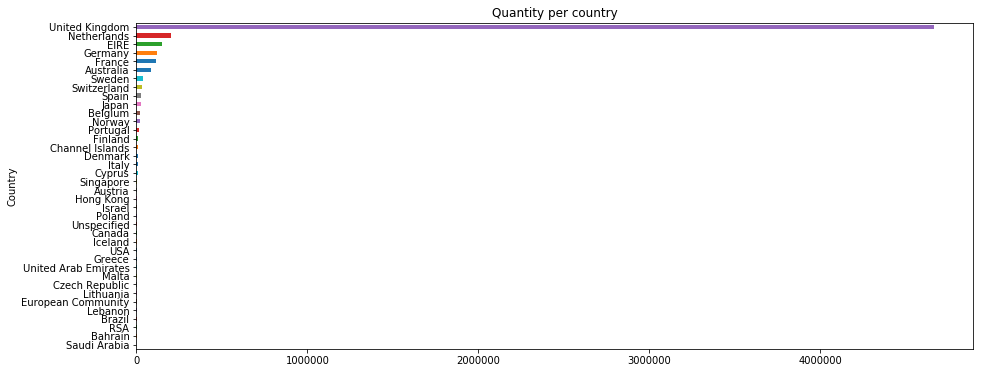

In [13]:
print(money20new.groupby('Country')['Quantity'].sum().sort_values(ascending=False))

print((money20new.groupby('Country')['Quantity'].sum()/money20new['Quantity'].sum()*100).sort_values(ascending=False))

fig, axes = plt.subplots(figsize=(15,6))
money20new.groupby('Country')['Quantity'].sum().sort_values().plot(kind='barh')
plt.title('Quantity per country')
plt.show()

In [14]:
money20new.groupby('Country')['Gross Revenue'].describe().sort_values('mean',ascending=False)

,count,mean,std,min,25%,50%,75%,max
Country,,,,,,,,
Netherlands,2359.0,121.003111,164.053990,0.390,30.000,91.80,158.400,4992.00
Australia,1182.0,117.192310,159.896353,0.420,17.700,66.00,152.910,1718.40
Japan,321.0,116.561900,312.249264,0.290,20.280,70.20,126.000,3794.40
Singapore,222.0,95.852658,369.856236,2.340,17.700,36.75,60.000,3949.32
Sweden,451.0,85.096075,117.512095,5.040,15.300,31.50,118.800,1188.00
Hong Kong,284.0,55.252817,219.515152,3.750,15.000,23.40,47.700,2653.95
Denmark,380.0,49.882474,72.225452,4.680,15.000,23.40,46.800,428.40
Lithuania,35.0,47.458857,23.824265,13.200,28.200,45.00,60.000,122.40
Bahrain,18.0,41.896667,48.496801,11.600,18.225,25.50,37.200,205.74


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

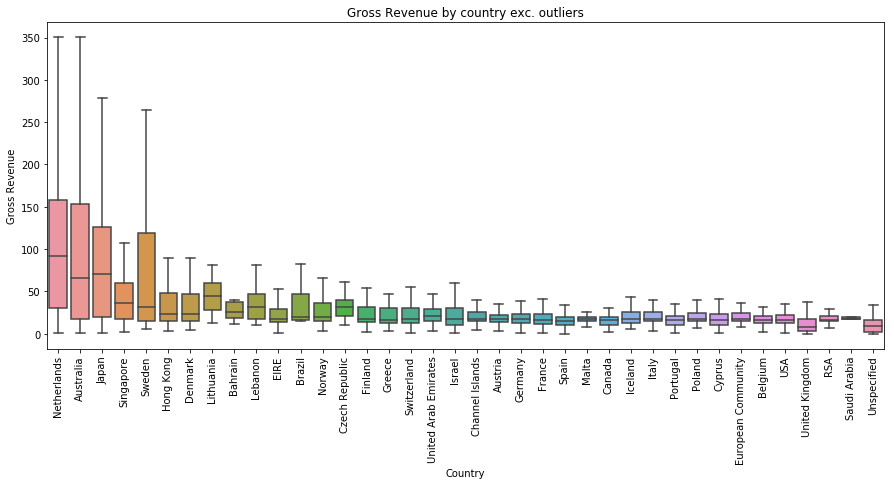

In [15]:
my_order = money20new.groupby('Country')['Gross Revenue'].mean().sort_values(ascending=False).index
 
fig, axes = plt.subplots(figsize=(15,6))
sns.boxplot(x='Country', y='Gross Revenue', data=money20new,showfliers=False,order=my_order).set_title('Gross Revenue by country exc. outliers')
plt.setp(axes.get_xticklabels(), rotation=90)

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

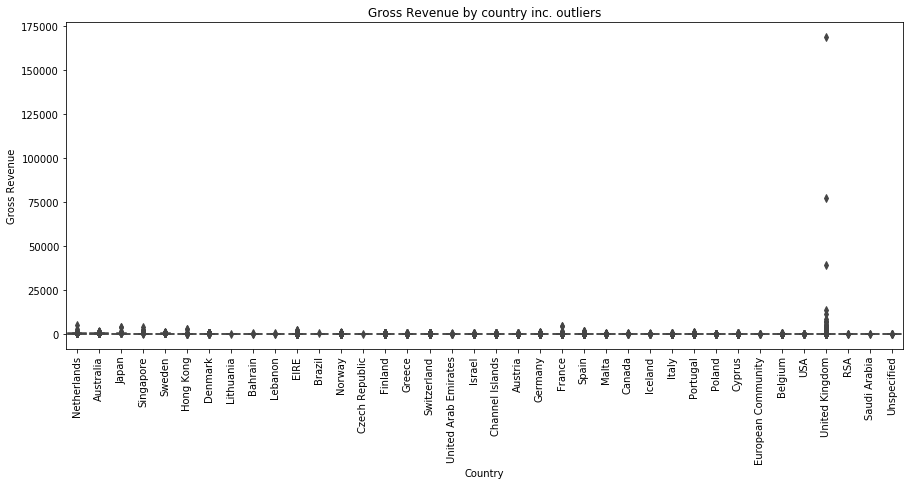

In [16]:
fig, axes = plt.subplots(figsize=(15,6))
sns.boxplot(x='Country', y='Gross Revenue', data=money20new,showfliers=True,order=my_order).set_title('Gross Revenue by country inc. outliers')
plt.setp(axes.get_xticklabels(), rotation=90)

In [17]:
money20new.groupby('Country')['UnitPrice'].mean().sort_values(ascending=False)

Country
Singapore               58.333288
Hong Kong               23.474437
Canada                   6.030331
Portugal                 5.843251
Cyprus                   5.710391
Lebanon                  5.387556
Finland                  5.296993
Norway                   5.287087
EIRE                     4.878321
Malta                    4.867768
European Community       4.830000
Italy                    4.717955
Bahrain                  4.597778
Greece                   4.574414
Channel Islands          4.531618
Brazil                   4.456250
France                   4.400237
RSA                      4.352632
Austria                  4.256030
Poland                   4.173364
United Kingdom           3.849679
Spain                    3.826224
Sweden                   3.760067
Germany                  3.709308
Israel                   3.630441
Belgium                  3.630158
United Arab Emirates     3.380735
Switzerland              3.374547
Denmark                  3.146184
Czech 

In [18]:
sns.factorplot

<function seaborn.categorical.factorplot(*args, **kwargs)>

Text(0.5, 1.0, 'Overall transactions by the hour')

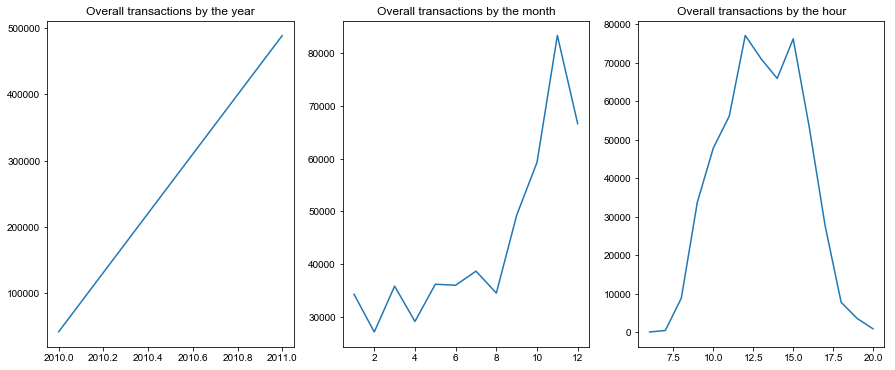

In [19]:
fig, axes = plt.subplots(1,3, figsize=(15,6))

sns.set(style="darkgrid")

money20year = money20new['InvoiceDate'].dt.year.value_counts().sort_index()
money20month = money20new['InvoiceDate'].dt.month.value_counts().sort_index()
money20hour = money20new['InvoiceDate'].dt.hour.value_counts().sort_index()



sns.lineplot(data=money20year,ax=axes[0]).set_title('Overall transactions by the year')

sns.lineplot(data=money20month,ax=axes[1]).set_title('Overall transactions by the month')

sns.lineplot(data=money20hour,ax=axes[2]).set_title('Overall transactions by the hour')

Text(0.5, 1.0, 'Overall Gross Revenue by the hour')

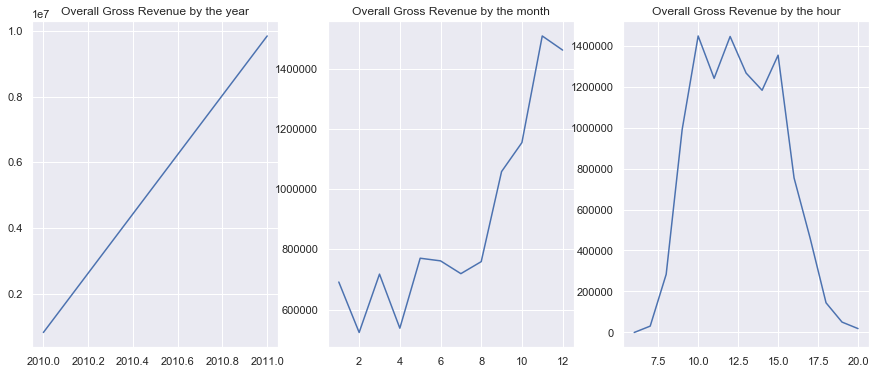

In [20]:
fig, axes = plt.subplots(1,3, figsize=(15,6))



sns.set(style="darkgrid")
m20salesyear = money20new.groupby(money20new['InvoiceDate'].dt.year)['Gross Revenue'].sum()
m20salesmonth = money20new.groupby(money20new['InvoiceDate'].dt.month)['Gross Revenue'].sum()
m20saleshour = money20new.groupby(money20new['InvoiceDate'].dt.hour)['Gross Revenue'].sum()

sns.lineplot(data=m20salesyear,ax=axes[0],ci=None).set_title('Overall Gross Revenue by the year')
sns.lineplot(data=m20salesmonth,ax=axes[1],ci=None).set_title('Overall Gross Revenue by the month')
sns.lineplot(data=m20saleshour,ax=axes[2],ci=None).set_title('Overall Gross Revenue by the hour')


In [21]:
money20new.groupby(money20new['InvoiceDate'].dt.month)['Gross Revenue'].sum()

InvoiceDate
1      691364.560
2      523631.890
3      717639.360
4      537808.621
5      770536.020
6      761739.900
7      719221.191
8      759138.380
9     1058590.172
10    1154979.300
11    1509496.330
12    1462538.820
Name: Gross Revenue, dtype: float64

In [22]:
money20new.groupby(money20new['InvoiceDate'].dt.year)['Gross Revenue'].sum()

InvoiceDate
2010    8.237461e+05
2011    9.842938e+06
Name: Gross Revenue, dtype: float64

In [23]:
money20new.groupby(money20new['InvoiceDate'].dt.hour)['Gross Revenue'].sum()

InvoiceDate
6           4.250
7       31059.210
8      283868.520
9      990267.821
10    1446742.701
11    1239954.440
12    1444245.880
13    1265736.300
14    1181812.371
15    1352972.180
16     754006.560
17     461603.491
18     144813.050
19      50665.010
20      18932.760
Name: Gross Revenue, dtype: float64

In [24]:
money20year


2010     41480
2011    488624
Name: InvoiceDate, dtype: int64

In [25]:
money20month.sort_values(ascending=False)

11    83369
12    66591
10    59304
9     49261
7     38645
5     36164
6     35977
3     35803
8     34483
1     34306
4     29096
2     27105
Name: InvoiceDate, dtype: int64

In [26]:
money20hour.sort_values(ascending=False)

12    77120
15    76246
13    71001
14    65937
11    56139
16    53369
10    47822
9     33701
17    27563
8      8800
18     7709
19     3515
20      802
7       379
6         1
Name: InvoiceDate, dtype: int64

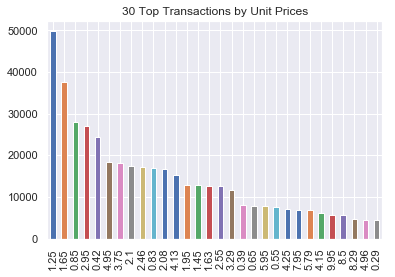

1.25    49753
1.65    37498
0.85    28061
2.95    27106
0.42    24302
Name: UnitPrice, dtype: int64


In [27]:
#UNIT PRICES by transaction, quantity and gross revenue

money20new['UnitPrice'].value_counts().head(30).plot(kind="bar")
plt.title('30 Top Transactions by Unit Prices')

plt.show()

print(money20new['UnitPrice'].value_counts().head(5))

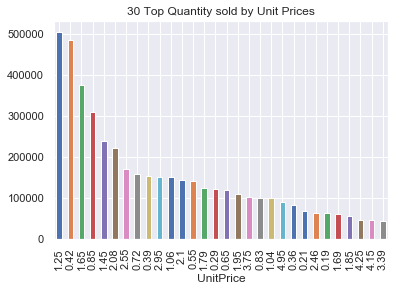

UnitPrice
1.25    506165
0.42    486751
1.65    376669
0.85    309684
1.45    237714
Name: Quantity, dtype: int64


In [28]:
#UNIT PRICES by transaction, quantity and gross revenue

money20new.groupby('UnitPrice')['Quantity'].sum().sort_values(ascending=False).head(30).plot(kind="bar")
plt.title('30 Top Quantity sold by Unit Prices')

plt.show()

print(money20new.groupby('UnitPrice')['Quantity'].sum().sort_values(ascending=False).head(5))

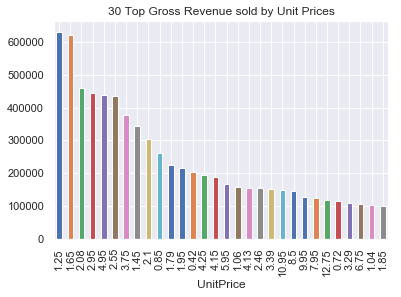

UnitPrice
1.25    632706.25
1.65    621503.85
2.08    459037.28
2.95    443623.95
4.95    440055.00
Name: Gross Revenue, dtype: float64


In [29]:
#UNIT PRICES by transaction, quantity and gross revenue

money20new.groupby('UnitPrice')['Gross Revenue'].sum().sort_values(ascending=False).head(30).plot(kind="bar")
plt.title('30 Top Gross Revenue sold by Unit Prices')

plt.show()

print(money20new.groupby('UnitPrice')['Gross Revenue'].sum().sort_values(ascending=False).head(5))

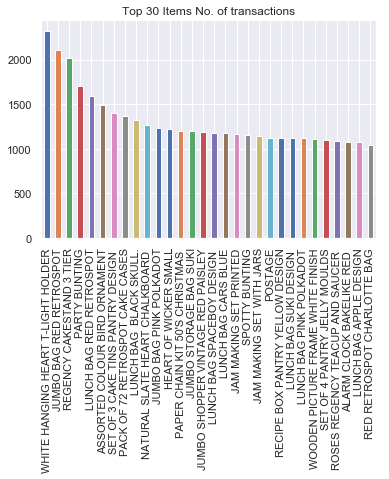

WHITE HANGING HEART T-LIGHT HOLDER    2323
JUMBO BAG RED RETROSPOT               2112
REGENCY CAKESTAND 3 TIER              2017
PARTY BUNTING                         1706
LUNCH BAG RED RETROSPOT               1594
Name: Description, dtype: int64


In [30]:
#ITEMS by transaction, quantity and gross revenue

money20new['Description'].value_counts().head(30).plot(kind="bar")
plt.title('Top 30 Items No. of transactions')
plt.show()

print(money20new['Description'].value_counts().sort_values(ascending=False).head(5))

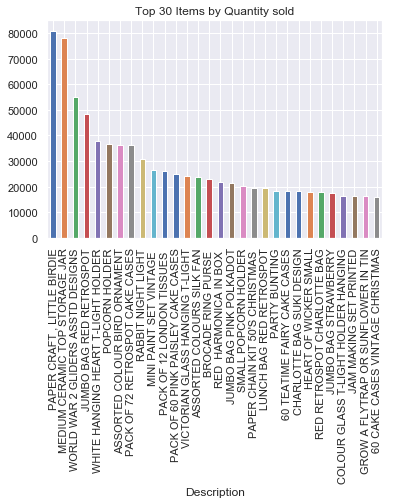

Description
PAPER CRAFT , LITTLE BIRDIE            80995
MEDIUM CERAMIC TOP STORAGE JAR         78033
WORLD WAR 2 GLIDERS ASSTD DESIGNS      55047
JUMBO BAG RED RETROSPOT                48474
WHITE HANGING HEART T-LIGHT HOLDER     37891
POPCORN HOLDER                         36761
ASSORTED COLOUR BIRD ORNAMENT          36461
PACK OF 72 RETROSPOT CAKE CASES        36419
RABBIT NIGHT LIGHT                     30788
MINI PAINT SET VINTAGE                 26633
PACK OF 12 LONDON TISSUES              26135
PACK OF 60 PINK PAISLEY CAKE CASES     24854
VICTORIAN GLASS HANGING T-LIGHT        24304
ASSORTED COLOURS SILK FAN              23826
BROCADE RING PURSE                     23056
RED  HARMONICA IN BOX                  21933
JUMBO BAG PINK POLKADOT                21465
SMALL POPCORN HOLDER                   20160
PAPER CHAIN KIT 50'S CHRISTMAS         19355
LUNCH BAG RED RETROSPOT                19353
PARTY BUNTING                          18295
60 TEATIME FAIRY CAKE CASES            1821

In [31]:
#ITEMS by transaction, quantity and gross revenue

money20new.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(30).plot(kind="bar")
plt.title('Top 30 Items by Quantity sold')
plt.show()

print(money20new.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(30))

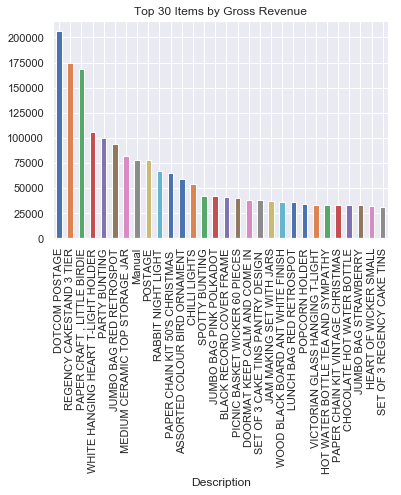

Description
DOTCOM POSTAGE                        206248.77
REGENCY CAKESTAND 3 TIER              174484.74
PAPER CRAFT , LITTLE BIRDIE           168469.60
WHITE HANGING HEART T-LIGHT HOLDER    106292.77
PARTY BUNTING                          99504.33
JUMBO BAG RED RETROSPOT                94340.05
MEDIUM CERAMIC TOP STORAGE JAR         81700.92
Manual                                 78112.82
POSTAGE                                78101.88
RABBIT NIGHT LIGHT                     66964.99
PAPER CHAIN KIT 50'S CHRISTMAS         64952.29
ASSORTED COLOUR BIRD ORNAMENT          59094.93
CHILLI LIGHTS                          54117.76
SPOTTY BUNTING                         42548.13
JUMBO BAG PINK POLKADOT                42436.24
BLACK RECORD COVER FRAME               40652.13
PICNIC BASKET WICKER 60 PIECES         39619.50
DOORMAT KEEP CALM AND COME IN          38166.64
SET OF 3 CAKE TINS PANTRY DESIGN       38158.39
JAM MAKING SET WITH JARS               37128.88
WOOD BLACK BOARD ANT WHITE F

In [32]:
#ITEMS by transaction, quantity and gross revenue

money20new.groupby('Description')['Gross Revenue'].sum().sort_values(ascending=False).head(30).plot(kind="bar")
plt.title('Top 30 Items by Gross Revenue')
plt.show()

print(money20new.groupby('Description')['Gross Revenue'].sum().sort_values(ascending=False).head(30))

In [33]:
money20new[money20new['Description']=='DOTCOM POSTAGE'].head() #706 rows

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Gross Revenue
1814,536544,DOT,DOTCOM POSTAGE,1,2010-12-01 14:32:00,569.77,NaN,United Kingdom,569.77
3041,536592,DOT,DOTCOM POSTAGE,1,2010-12-01 17:06:00,607.49,NaN,United Kingdom,607.49
5450,536862,DOT,DOTCOM POSTAGE,1,2010-12-03 11:13:00,254.43,NaN,United Kingdom,254.43
5545,536864,DOT,DOTCOM POSTAGE,1,2010-12-03 11:27:00,121.06,NaN,United Kingdom,121.06
5685,536865,DOT,DOTCOM POSTAGE,1,2010-12-03 11:28:00,498.47,NaN,United Kingdom,498.47


In [34]:
money20new[money20new['Description']=='REGENCY CAKESTAND 3 TIER'].head(5) #2017 rows

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Gross Revenue
880,536477,22423,REGENCY CAKESTAND 3 TIER,16,2010-12-01 12:27:00,10.95,16210.0,United Kingdom,175.20
936,536502,22423,REGENCY CAKESTAND 3 TIER,2,2010-12-01 12:36:00,12.75,16552.0,United Kingdom,25.50
1092,536525,22423,REGENCY CAKESTAND 3 TIER,2,2010-12-01 12:54:00,12.75,14078.0,United Kingdom,25.50
1155,536528,22423,REGENCY CAKESTAND 3 TIER,1,2010-12-01 13:17:00,12.75,15525.0,United Kingdom,12.75
1197,536530,22423,REGENCY CAKESTAND 3 TIER,1,2010-12-01 13:21:00,12.75,17905.0,United Kingdom,12.75


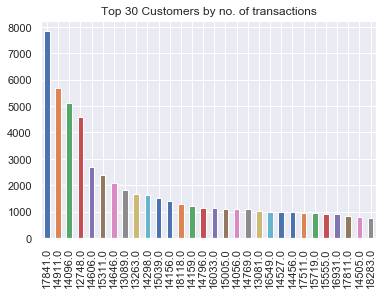

17841.0    7847
14911.0    5675
14096.0    5111
12748.0    4595
14606.0    2700
Name: CustomerID, dtype: int64


In [35]:
#CUSTOMERS by transaction, quantity and gross revenue

money20new['CustomerID'].value_counts().head(30).plot(kind="bar")
plt.title('Top 30 Customers by no. of transactions')
plt.show()

print(money20new['CustomerID'].value_counts().sort_values(ascending=False).head(5))

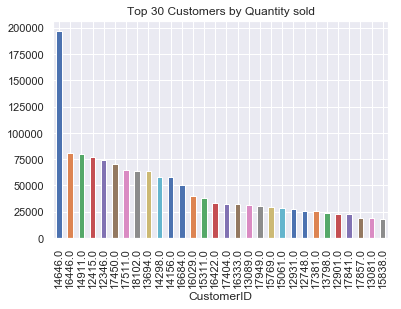

CustomerID
14646.0    196915
16446.0     80997
14911.0     80265
12415.0     77374
12346.0     74215
17450.0     69993
17511.0     64549
18102.0     64124
13694.0     63312
14298.0     58343
14156.0     57885
16684.0     50255
16029.0     40208
15311.0     38194
16422.0     33704
17404.0     32748
16333.0     32184
13089.0     31070
17949.0     30546
15769.0     29672
15061.0     28920
12931.0     28004
12748.0     25747
17381.0     25649
13798.0     23948
12901.0     23075
17841.0     23071
17857.0     19256
13081.0     19068
15838.0     18368
Name: Quantity, dtype: int64


In [36]:
#CUSTOMERS by transaction, quantity and gross revenue

money20new.groupby('CustomerID')['Quantity'].sum().sort_values(ascending=False).head(30).plot(kind="bar")
plt.title('Top 30 Customers by Quantity sold')
plt.show()

print(money20new.groupby('CustomerID')['Quantity'].sum().sort_values(ascending=False).head(30))

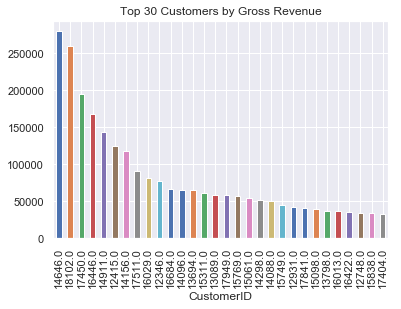

CustomerID
14646.0    280206.02
18102.0    259657.30
17450.0    194550.79
16446.0    168472.50
14911.0    143825.06
12415.0    124914.53
14156.0    117379.63
17511.0     91062.38
16029.0     81024.84
12346.0     77183.60
16684.0     66653.56
14096.0     65164.79
13694.0     65039.62
15311.0     60767.90
13089.0     58825.83
17949.0     58510.48
15769.0     56252.72
15061.0     54534.14
14298.0     51527.30
14088.0     50491.81
15749.0     44534.30
12931.0     42055.96
17841.0     40991.57
15098.0     39916.50
13798.0     37153.85
16013.0     37130.60
16422.0     34684.40
12748.0     33719.73
15838.0     33643.08
17404.0     31906.82
Name: Gross Revenue, dtype: float64


In [37]:
#CUSTOMERS by transaction, quantity and gross revenue

money20new.groupby('CustomerID')['Gross Revenue'].sum().sort_values(ascending=False).head(30).plot(kind="bar")
plt.title('Top 30 Customers by Gross Revenue')
plt.show()

print(money20new.groupby('CustomerID')['Gross Revenue'].sum().sort_values(ascending=False).head(30))

In [38]:
money20new[money20new['UnitPrice']==1.25].head() #49,753 transactions

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Gross Revenue
32,536370,21791,VINTAGE HEADS AND TAILS CARD GAME,24,2010-12-01 08:45:00,1.25,12583.0,France,30.0
101,536378,85183B,CHARLIE & LOLA WASTEPAPER BIN FLORA,48,2010-12-01 09:37:00,1.25,14688.0,United Kingdom,60.0
110,536381,21672,WHITE SPOT RED CERAMIC DRAWER KNOB,6,2010-12-01 09:41:00,1.25,15311.0,United Kingdom,7.5
111,536381,22774,RED DRAWER KNOB ACRYLIC EDWARDIAN,24,2010-12-01 09:41:00,1.25,15311.0,United Kingdom,30.0
112,536381,22771,CLEAR DRAWER KNOB ACRYLIC EDWARDIAN,24,2010-12-01 09:41:00,1.25,15311.0,United Kingdom,30.0


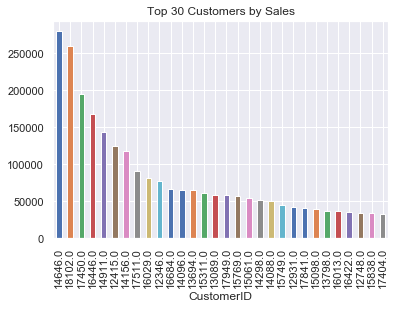

In [39]:
money20new.groupby('CustomerID')['Gross Revenue'].sum().sort_values(ascending=False).head(30).plot(kind="bar")
plt.title('Top 30 Customers by Sales')
plt.show()

In [40]:
money20new.groupby('CustomerID')['Gross Revenue'].sum().head(10).sort_values(ascending=False)

CustomerID
12346.0    77183.60
12347.0     4310.00
12356.0     2811.43
12352.0     2506.04
12348.0     1797.24
12349.0     1757.55
12354.0     1079.40
12355.0      459.40
12350.0      334.40
12353.0       89.00
Name: Gross Revenue, dtype: float64

In [41]:
money20new[money20new['CustomerID']==14911].sort_values('Gross Revenue',ascending=False).head() #bought 2076 times

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Gross Revenue
117054,546328,M,Manual,1,2011-03-11 10:19:00,1687.17,14911.0,EIRE,1687.17
117055,546329,M,Manual,1,2011-03-11 10:22:00,1687.17,14911.0,EIRE,1687.17
321957,565213,22950,36 DOILIES VINTAGE CHRISTMAS,432,2011-09-01 17:19:00,1.25,14911.0,EIRE,540.00
321955,565213,21888,BINGO SET,144,2011-09-01 17:19:00,3.75,14911.0,EIRE,540.00
290316,562374,22910,PAPER CHAIN KIT VINTAGE CHRISTMAS,200,2011-08-04 14:40:00,2.55,14911.0,EIRE,510.00


In [42]:
money20new[money20new['CustomerID']==18102.0].sort_values('Gross Revenue',ascending=False).head() #431 times

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Gross Revenue
16438,537659,21623,VINTAGE UNION JACK MEMOBOARD,600,2010-12-07 16:43:00,6.38,18102.0,United Kingdom,3828.0
411229,572209,23556,LANDMARK FRAME COVENT GARDEN,300,2011-10-21 12:08:00,10.95,18102.0,United Kingdom,3285.0
411235,572209,23557,LANDMARK FRAME BAKER STREET,300,2011-10-21 12:08:00,10.95,18102.0,United Kingdom,3285.0
411234,572209,23553,LANDMARK FRAME CAMDEN TOWN,300,2011-10-21 12:08:00,10.95,18102.0,United Kingdom,3285.0
411232,572209,23558,LANDMARK FRAME LONDON BRIDGE,300,2011-10-21 12:08:00,10.95,18102.0,United Kingdom,3285.0


Text(0.5, 1.0, 'Distribution of UK Gross Revenue inc. outliers ')

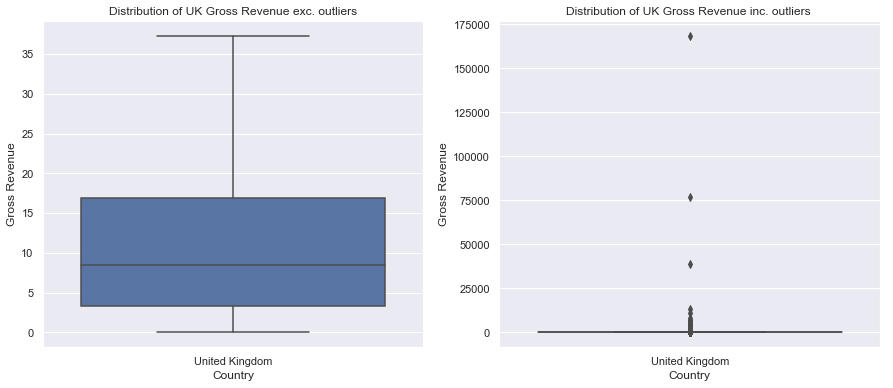

In [43]:
#To see the distribution of Gross Revenues

money20UK = money20new.loc[money20new['Country']=='United Kingdom',:]

fig, axes = plt.subplots(1,2, figsize=(15,6))

sns.boxplot(x='Country', y='Gross Revenue', data=money20UK,showfliers=False,ax= axes [0]).set_title('Distribution of UK Gross Revenue exc. outliers')
sns.boxplot(x='Country', y='Gross Revenue', data=money20UK,ax = axes [1]).set_title('Distribution of UK Gross Revenue inc. outliers ')

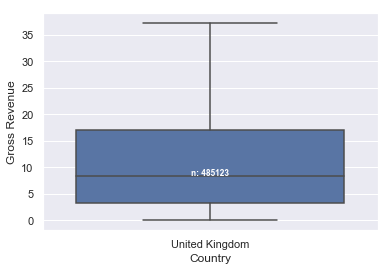

In [44]:
#Stack Overflow showing number of observations

#Who are these outliers?
ax = sns.boxplot(x="Country", y="Gross Revenue", showfliers=False,data=money20UK)
 
# Calculate number of obs per group & median to position labels
medians = money20UK.groupby(['Country'])['Gross Revenue'].median().values
nobs = money20UK['Country'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]
 
# Add it to the plot
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 0.03, nobs[tick], horizontalalignment='center', size='x-small', color='w', weight='semibold')

plt.show()

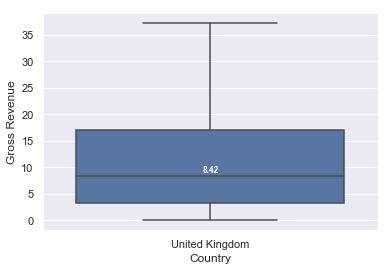

In [45]:
#Stack overflow showing median

ax = sns.boxplot(x="Country", y="Gross Revenue",showfliers=False, data=money20UK)

medians = money20UK.groupby(['Country'])['Gross Revenue'].median().values
median_labels = [str(np.round(s, 2)) for s in medians]

pos = range(len(medians))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 0.5, median_labels[tick], 
            horizontalalignment='center', size='x-small', color='w', weight='semibold')
    


    

In [46]:
money20UK['Gross Revenue'].describe()

count    485123.000000
mean         18.603987
std         281.280229
min           0.001000
25%           3.360000
50%           8.420000
75%          16.950000
max      168469.600000
Name: Gross Revenue, dtype: float64

%%time

money20UKexcout = money20UK[money20UK['Gross Revenue'].apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]
print(money20UKexcout)

In [47]:
#Calculating Quantile of Money20 UK AND UPPER WHISKER 37.3

print("Q1 quantile: ", money20UK['Gross Revenue'].quantile(0.25)) 
print("Q2 quantile: ", money20UK['Gross Revenue'].quantile(0.50)) #Median
print("Q3 quantile: ", money20UK['Gross Revenue'].quantile(0.75)) 
print("Q4 quantile: ", money20UK['Gross Revenue'].quantile(.80))  

#UPPER WHISKER is 37.3

median = money20UK['Gross Revenue'].quantile(0.50)
upper_quartile = money20UK['Gross Revenue'].quantile(0.75)
lower_quartile = money20UK['Gross Revenue'].quantile(0.25)

iqr = upper_quartile - lower_quartile
upper_whisker = money20UK[money20UK['Gross Revenue']<=upper_quartile+1.5*iqr].max()
lower_whisker = money20UK[money20UK['Gross Revenue']>=lower_quartile-1.5*iqr].min()
print('')
print(upper_whisker)


Q1 quantile:  3.36
Q2 quantile:  8.42
Q3 quantile:  16.95
Q4 quantile:  19.740000000000002

InvoiceNo                                  581586
StockCode                                       m
Description      ZINC WIRE SWEETHEART LETTER TRAY
Quantity                                      900
InvoiceDate                   2011-12-09 12:49:00
UnitPrice                                   36.71
CustomerID                                  18287
Country                            United Kingdom
Gross Revenue                                37.3
dtype: object


In [48]:
#Minimum amount

money20UK[money20UK['Gross Revenue']==.001]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Gross Revenue
157195,550193,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-04-15 09:27:00,0.001,13952.0,United Kingdom,0.001
279045,561226,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-07-26 10:13:00,0.001,15618.0,United Kingdom,0.001
359871,568200,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-09-25 14:58:00,0.001,16198.0,United Kingdom,0.001
361741,568375,BANK CHARGES,Bank Charges,1,2011-09-26 17:01:00,0.001,13405.0,United Kingdom,0.001


In [49]:
#All the outliers - above the interquartile range

money20UKoutliers=money20UK[money20UK['Gross Revenue']>37.3]
money20UKoutliers.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Gross Revenue
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08
46,536371,22086,PAPER CHAIN KIT 50'S CHRISTMAS,80,2010-12-01 09:00:00,2.55,13748.0,United Kingdom,204.00
65,536374,21258,VICTORIAN SEWING BOX LARGE,32,2010-12-01 09:09:00,10.95,15100.0,United Kingdom,350.40
82,536376,22114,HOT WATER BOTTLE TEA AND SYMPATHY,48,2010-12-01 09:32:00,3.45,15291.0,United Kingdom,165.60
83,536376,21733,RED HANGING HEART T-LIGHT HOLDER,64,2010-12-01 09:32:00,2.55,15291.0,United Kingdom,163.20


In [50]:
money20UKinliers=money20UK[money20UK['Gross Revenue']<=37.3]
money20UKinliers.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Gross Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [51]:
#How much the outliers are able to generate?
print(money20UK['Gross Revenue'].sum())

print('')
print(money20UKoutliers['Quantity'].sum())
print(money20UKoutliers['Gross Revenue'].sum())


9025222.084000003

2041530
4557079.4799999995


In [52]:
#How much inliers are able to generate?

print(money20UKinliers['Quantity'].sum())
print(money20UKinliers['Gross Revenue'].sum())

2620860
4468142.603999999


In [53]:
print('total num of customers')
print(money20UK['CustomerID'].nunique())

print('outliers')
print(money20UKoutliers['CustomerID'].nunique())

print('inliers')
print(money20UKinliers['CustomerID'].nunique())

total num of customers
3920
outliers
2598
inliers
3776


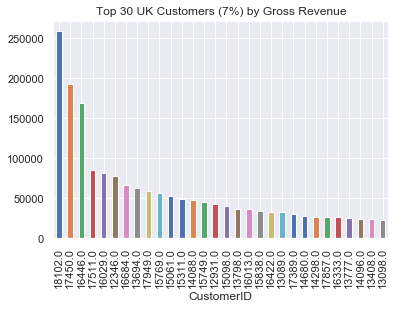

CustomerID
18102.0    259080.05
17450.0    193318.87
16446.0    168469.60
17511.0     85454.91
16029.0     80780.04
Name: Gross Revenue, dtype: float64


In [54]:
#Outliers - The 7% - #CustomerID 18102 is also the #2 Sport overall

money20UKoutliers.groupby('CustomerID')['Gross Revenue'].sum().sort_values(ascending=False).head(30).plot(kind="bar")
plt.title('Top 30 UK Customers (7%) by Gross Revenue')
plt.show()

print(money20UKoutliers.groupby('CustomerID')['Gross Revenue'].sum().sort_values(ascending=False).head(5))

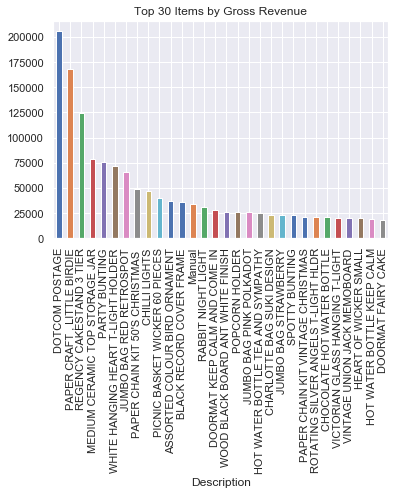

Description
DOTCOM POSTAGE                    205753.66
PAPER CRAFT , LITTLE BIRDIE       168469.60
REGENCY CAKESTAND 3 TIER          124725.33
MEDIUM CERAMIC TOP STORAGE JAR     78651.44
PARTY BUNTING                      75994.31
Name: Gross Revenue, dtype: float64

In [55]:
#Outliers - what do they buy?

money20UKoutliers.groupby('Description')['Gross Revenue'].sum().sort_values(ascending=False).head(30).plot(kind="bar")
plt.title('Top 30 Items by Gross Revenue')
plt.show()

money20UKoutliers.groupby('Description')['Gross Revenue'].sum().sort_values(ascending=False).head(5)


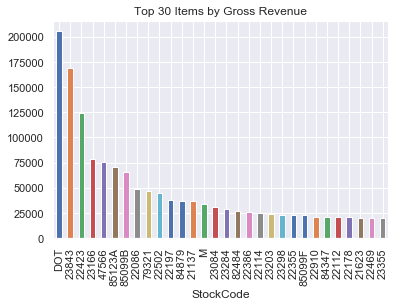

StockCode
DOT      205753.66
23843    168469.60
22423    124725.33
23166     78651.44
47566     75994.31
Name: Gross Revenue, dtype: float64

In [82]:
#Outliers - what do they buy?

money20UKoutliers.groupby('StockCode')['Gross Revenue'].sum().sort_values(ascending=False).head(30).plot(kind="bar")
plt.title('Top 30 Items by Gross Revenue')
plt.show()

money20UKoutliers.groupby('StockCode')['Gross Revenue'].sum().sort_values(ascending=False).head(5)

In [56]:
#Who is the 7%?
print('Gross Revenue')
print(money20UKoutliers['Gross Revenue'].describe())
print(money20UKoutliers['Gross Revenue'].median())
print('')


print('No of customers:')
print(money20UKoutliers['CustomerID'].nunique())
print('')

print('Quantity:')
print(money20UKoutliers['Quantity'].describe())
print('')

print(money20UKoutliers['Quantity'].median())


Gross Revenue
count     35139.000000
mean        129.687227
std        1038.357080
min          37.350000
25%          47.400000
50%          67.800000
75%         108.480000
max      168469.600000
Name: Gross Revenue, dtype: float64
67.8

No of customers:
2598

Quantity:
count    35139.000000
mean        58.098694
std        598.684946
min          1.000000
25%         12.000000
50%         24.000000
75%         48.000000
max      80995.000000
Name: Quantity, dtype: float64

24.0


In [57]:
money20UKoutliers[money20UKoutliers['Gross Revenue']==168469.6]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Gross Revenue
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom,168469.6


Text(0.5, 1.0, 'Distribution of UK Gross Revenue the 7%')

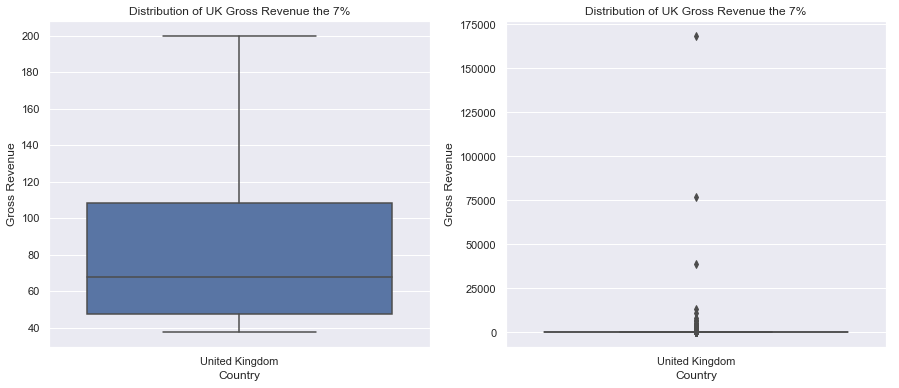

In [58]:
fig, axes = plt.subplots(1,2, figsize=(15,6))

sns.boxplot(x='Country', y='Gross Revenue', data=money20UKoutliers,showfliers=False,ax=axes[0]).set_title('Distribution of UK Gross Revenue the 7%')
sns.boxplot(x='Country', y='Gross Revenue', data=money20UKoutliers,showfliers=True,ax=axes[1]).set_title('Distribution of UK Gross Revenue the 7%')


In [59]:
#Comparisons 
print('Gross Revenue')
print(money20UKoutliers['Gross Revenue'].sum())
print (money20UK['Gross Revenue'].sum())
print(money20new['Gross Revenue'].sum())
print('')

print('Transactions')
print(money20UKoutliers['Gross Revenue'].count())
print (money20UK['Gross Revenue'].count())
print(money20new['Gross Revenue'].count())
print('')

print('Quantity')
print(money20UKoutliers['Quantity'].sum())
print (money20UK['Quantity'].sum())
print(money20new['Quantity'].sum())

Gross Revenue
4557079.4799999995
9025222.084000003
10666684.544

Transactions
35139
485123
530104

Quantity
2041530
4662390
5588376


In [60]:
#Easy csv translated calculations into better csv format
summary = pd.read_csv('summary.csv')
summary.head()

,Country,Gross Revenue,Transactions,Quantity
0,UK outliers,4.557079e+06,35139,2041530
1,UK,9.025222e+06,485123,4662390
2,All Countries,1.066668e+07,530104,5588376


Text(0.5, 1.0, 'Gross Revenue')

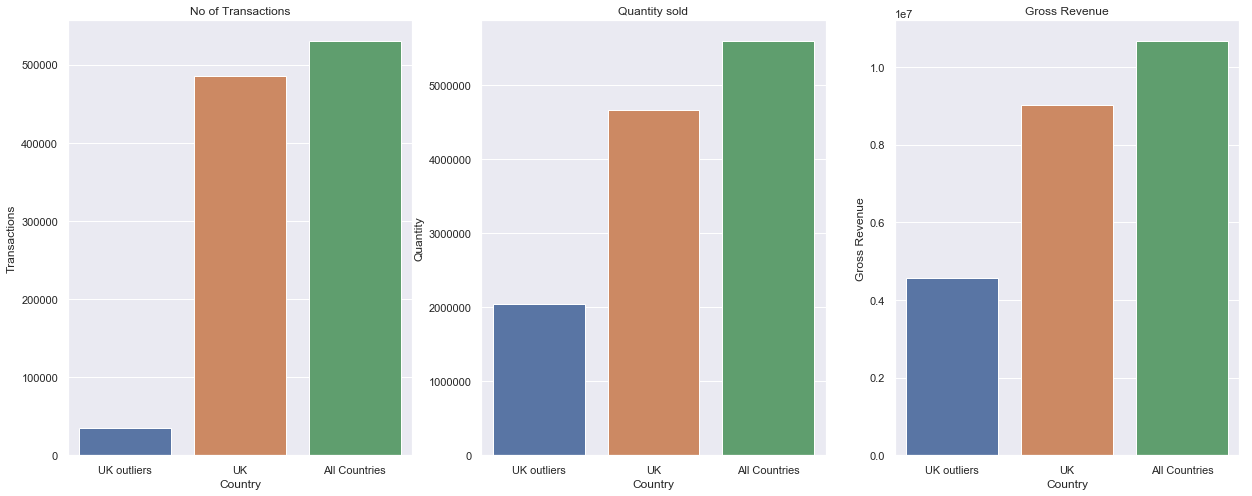

In [61]:
fig, axes = plt.subplots(1,3, figsize=(21,8))

sns.barplot(x='Country',y='Transactions',data=summary,ax=axes[0]).set_title('No of Transactions')
sns.barplot(x='Country',y='Quantity',data=summary,ax=axes[1]).set_title('Quantity sold')
sns.barplot(x='Country',y='Gross Revenue',data=summary,ax=axes[2]).set_title('Gross Revenue')

C:\Users\Monchita\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Wall time: 1min 17s


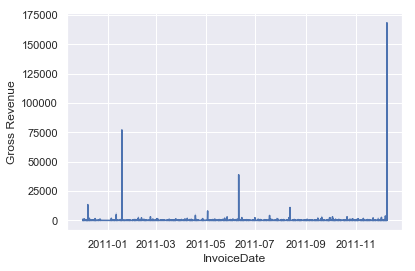

In [62]:
%%time

sns.lineplot(x='InvoiceDate', y='Gross Revenue', data=money20UKoutliers)

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

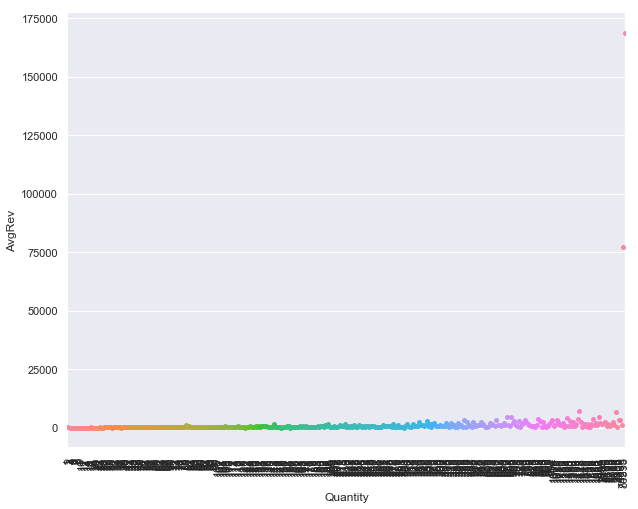

In [63]:
#with the outliers

outmean = pd.read_csv('Outliersmean.csv')
outmean.head()

fig, axes = plt.subplots(figsize=(10,8))
sns.swarmplot(x='Quantity',y='AvgRev',data=outmean)
plt.setp(axes.get_xticklabels(), rotation=90)

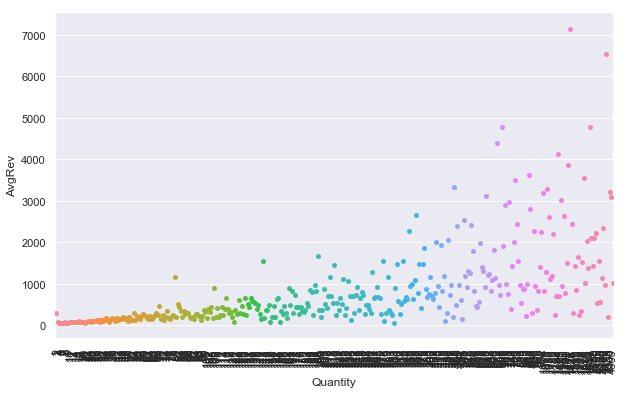

In [64]:
#without the last two outliers
outmean2 = pd.read_csv('Outliersmean2.csv')
outmean2.head()

fig, axes = plt.subplots(figsize=(10,6))
sns.swarmplot(x='Quantity',y='AvgRev',data=outmean2)
plt.setp(axes.get_xticklabels(), rotation=90)
plt.show()

In [65]:
#trying out a clustering method

from sklearn.cluster import KMeans, k_means
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() #we're standardising it. we're initialising it kind of like regression - imported package
outmean2_scaled = pd.DataFrame(scaler.fit_transform(outmean2), columns=['Quantity', 'AvgRev'])
#.fit is scaling it. as you can see from below, as you can see below it's standardised. the actual values are standardised values


#model = KMeans(n_clusters=3, random_state=0).fit(outmean2_scaled)

C:\Users\Monchita\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Monchita\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


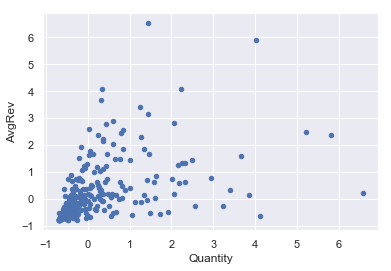

In [66]:
outmean2_scaled.plot(x='Quantity',y='AvgRev', kind='scatter')

In [67]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(outmean2_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [68]:
predicted = kmeans.labels_
outmean2_scaled['labels'] = predicted
outmean2_scaled

,Quantity,AvgRev,labels
0,-0.698844,-0.546680,0
1,-0.697329,-0.767133,0
2,-0.695815,-0.793646,0
3,-0.694300,-0.787949,0
4,-0.692785,-0.786255,0
5,-0.691270,-0.782079,0
6,-0.689755,-0.777597,0
7,-0.688240,-0.782928,0
8,-0.686726,-0.781142,0
9,-0.685211,-0.772795,0


In [69]:
# 3. Get our centroids
centroids = kmeans.cluster_centers_
centroids

array([[-0.49176836, -0.51606031],
       [ 0.64032144,  2.27098369],
       [ 5.8669333 ,  1.6728054 ],
       [ 2.27519091,  0.38435206],
       [ 0.14086426,  0.2910364 ],
       [ 2.55955477,  5.509944  ]])

<Figure size 720x504 with 0 Axes>

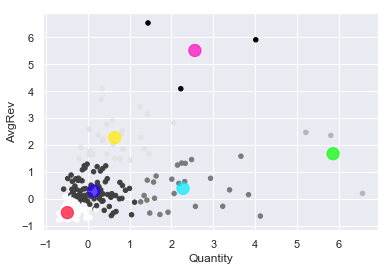

In [70]:
plt.figure(figsize=(10,7))

outmean2_scaled.plot(x='Quantity', y='AvgRev', kind="scatter", color=outmean2_scaled['labels'], )

plt.scatter(centroids[:,:1], centroids[:,1:], marker='o', s=150, alpha=.7, \
            c=np.array(range(0,6)).reshape(-1,1), cmap='gist_rainbow') #

#Change the c range for number of centroids

In [71]:
def plot_inertia_values(k_min, k_max):
    inertia_values = []
    k_values = range(k_min, k_max+1)

    for k in k_values:
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(outmean2_scaled) #is it the scaled data or the original data???
        inertia_values.append(kmeans.inertia_)

    fig, ax = plt.subplots()
    ax.plot(k_values, inertia_values)
    ax.set_title("Inertia values for different $k$")
    ax.set_xlabel("k")
    ax.set_ylabel("Inertia")
    ax.set_ylim((0, 300))
    ax.set_xticks(k_values)
    plt.show()

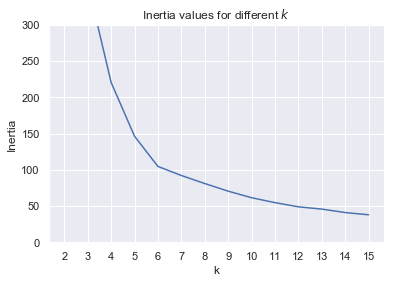

In [72]:
plot_inertia_values(k_min=2, k_max=15)

#The elbow code - where the line changes. - the 'x' value shows how many numbers it should have
#the lower the inertia score the denser it is

In [73]:
money20UKoutliers.groupby('StockCode')['Gross Revenue'].sum().head(10).sort_values(ascending=False)

StockCode
15036     11438.52
15039      1243.75
11001       931.89
10135       390.00
15034       345.58
15044B      308.10
10133       268.80
15044A      233.70
15044C      127.50
10002       103.70
Name: Gross Revenue, dtype: float64

In [81]:
money20UKoutliers[money20UKoutliers['StockCode'] == '11001'].head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Gross Revenue
137411,548160,11001,ASSTD DESIGN RACING CAR PEN,32,2011-03-29 13:33:00,1.69,16253.0,United Kingdom,54.08
175629,551982,11001,ASSTD DESIGN RACING CAR PEN,32,2011-05-05 13:56:00,1.69,15023.0,United Kingdom,54.08
